In [73]:
%matplotlib inline

In [76]:
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
#from api_keys import api_key
from itertools import islice
# Google API Key
from apikey import gkey
from weatherkey import api_key


In [38]:
median_price_by_state = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\StateMedianIHomePrice2017.csv")

median_income_by_state = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\StateMedianIncome2017.csv")

zip_code_coordinates = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\ZipCodeCoordinates.csv")

price_change_by_zip = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\ZipCodeHomepriceincrease.csv")

test_file = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\test_file.csv")

In [22]:
median_price_by_state.head(3)

,State,Median Home Price
0,Alabama,130500
1,Alaska,305800
2,Arizona,252300


In [23]:
median_income_by_state.head(3)

,State,Median Household Income
0,Maryland,81084
1,Washington,75418
2,New Hampshire,74801


In [24]:
price_income = pd.merge(median_price_by_state, median_income_by_state, on=["State"])

price_income.head(3)

,State,Median Home Price,Median Household Income
0,Alabama,130500,51113
1,Alaska,305800,72231
2,Arizona,252300,61125


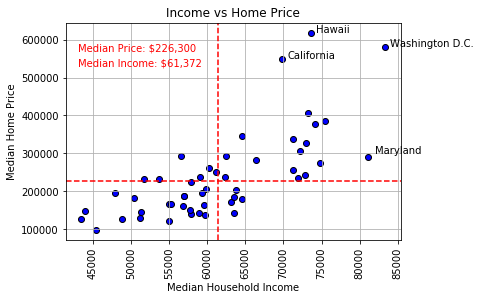

In [25]:
#This scatter plot wills how a relationship between median household income and median home price. 

plt.scatter(price_income["Median Household Income"],price_income["Median Home Price"], marker = "o", 
            facecolors="blue", edgecolor="black")

plt.title("Income vs Home Price")
plt.xlabel("Median Household Income")
plt.ylabel("Median Home Price")
plt.axhline(226300, color = "red",ls = "--", alpha =1, label="US Median Home Price")
plt.axvline(61372, color = "red",ls = "--", alpha =1, label="US Median Home Price")
plt.text(74300,617900,"Hawaii")
plt.text(82000,300000,"Maryland")
plt.text(84000,581000,"Washington D.C.")
plt.text(70500,550000,"California")
#plt.text(35500,226300,"226300", color = "red")
plt.text(43000,570000,"Median Price: $226,300", color = "red")
plt.text(43000,530000,"Median Income: $61,372", color = "red")
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

In [26]:
price_income["Price to Income"] = (price_income["Median Home Price"]/price_income["Median Household Income"])

price_income.head()

,State,Median Home Price,Median Household Income,Price to Income
0,Alabama,130500,51113,2.553167
1,Alaska,305800,72231,4.233639
2,Arizona,252300,61125,4.127607
3,Arkansas,126200,48829,2.584530
4,California,548800,69759,7.867085


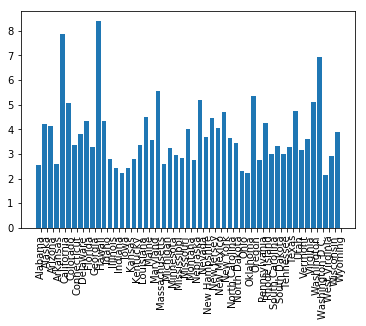

<Figure size 1440x360 with 0 Axes>

In [27]:

x_axis = np.arange(len(price_income))
tick_locations = [value+0.5 for value in x_axis]
plt.bar(x_axis,price_income["Price to Income"])
plt.xticks(tick_locations, price_income["State"], rotation="vertical")

plt.figure(figsize=(20,5))

plt.show()

In [28]:
zip_code_coordinates.head(3)

,Zip Code,Latitude,Longitude
0,99553,54.1430,-165.7854
1,99571,55.1858,-162.7211
2,99583,54.8542,-163.4113


In [29]:
price_change_by_zip.head(3)



,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase
0,NY,New York,10025,New York,305100,1051300,344.58
1,IL,Illinois,60657,Chicago,212600,353200,166.13
2,NY,New York,10023,New York,516100,1373100,266.05


In [30]:
price_change_w_coordinates = pd.merge(price_change_by_zip, zip_code_coordinates, on=["Zip Code"])

price_change_w_coordinates.head()

,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase,Latitude,Longitude
0,NY,New York,10025,New York,305100,1051300,344.58,40.7975,-73.9683
1,IL,Illinois,60657,Chicago,212600,353200,166.13,41.9399,-87.6528
2,NY,New York,10023,New York,516100,1373100,266.05,40.7764,-73.9827
3,TX,Texas,77494,Katy,311700,335900,107.76,29.7404,-95.8304
4,IL,Illinois,60614,Chicago,257500,432400,167.92,41.9229,-87.6483


# ## Google API. Need to figure out how to get the count of the various places. Currently, it only brings in the first hit

In [31]:
price_change_w_coordinates["Name"] = ""
price_change_w_coordinates["Address"] = ""
price_change_w_coordinates["Rating"] = ""
price_change_w_coordinates.head()

,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase,Latitude,Longitude,Name,Address,Rating
0,NY,New York,10025,New York,305100,1051300,344.58,40.7975,-73.9683,,,
1,IL,Illinois,60657,Chicago,212600,353200,166.13,41.9399,-87.6528,,,
2,NY,New York,10023,New York,516100,1373100,266.05,40.7764,-73.9827,,,
3,TX,Texas,77494,Katy,311700,335900,107.76,29.7404,-95.8304,,,
4,IL,Illinois,60614,Chicago,257500,432400,167.92,41.9229,-87.6483,,,


In [63]:
# params dictionary to update each iteration

params = {
    "radius": 50000,
    "types": "coffeeshop",
    "keyword": "starbucks",
    "key": gkey
}

#params = {
#    "radius": 50000,
#    "types": "grocery store",
#    "keyword": "grocery store",
#    "key": gkey
#}


#params = {
#    "radius": 50000,
#    "types": "airport",
#    "keyword": "airport",
#    "key": gkey
#}


#params = {
#    "radius": 50000,
#    "types": "gym",
#    "keyword": "gym",
#    "key": gkey
#}



# Use the lat/lng we recovered to identify search name
for index, row in test_file.iterrows():
    # get lat, lng from df
    lat = row["Latitude"]
    lng = row["Longitude"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    #base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    
#     print the name_address url, avoid doing for public github repos in order to avoid exposing key
#     print(name_address.url)

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        test_file.loc[index, "Name"] = name_address["results"][0]["name"]
        test_file.loc[index, "Address"] = name_address["results"][0]["vicinity"]
        test_file.loc[index, "Rating"] = name_address["results"][0]["rating"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

In [64]:
test_file

,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase,Latitude,Longitude,Name,Address,Rating
0,NY,New York,10025,New York,305100,1051300,344.58,40.7975,-73.9683,Starbucks,"805 Columbus Ave, New York",3.9
1,IL,Illinois,60657,Chicago,212600,353200,166.13,41.9399,-87.6528,Starbucks,"3184 N Clark St, Chicago",4.0
2,NY,New York,10023,New York,516100,1373100,266.05,40.7764,-73.9827,Starbucks,"267-275 Columbus Ave, New York",4.0
3,TX,Texas,77494,Katy,311700,335900,107.76,29.7404,-95.8304,Starbucks,"1712 Spring Green Blvd, Katy",3.8
4,IL,Illinois,60614,Chicago,257500,432400,167.92,41.9229,-87.6483,Starbucks,"2063 N Clark St, Chicago",3.9
5,TX,Texas,79936,El Paso,82700,127500,154.17,31.7677,-106.3016,Starbucks,"1874 Joe Battle Blvd, El Paso",4.3
6,TX,Texas,77449,Katy,113100,180900,159.95,29.8323,-95.7360,Starbucks,"19914 Park Row, Katy",3.7
7,TX,Texas,77084,Houston,104500,173400,165.93,29.8440,-95.6623,Starbucks,"6843 Hwy 6 N, Houston",4.0
8,NY,New York,10467,New York,163200,422400,258.82,40.8737,-73.8712,Starbucks,"440 E Fordham Rd, The Bronx",4.2
9,IL,Illinois,60640,Chicago,143400,237300,165.48,41.9719,-87.6624,Starbucks,"4753 N Broadway, Chicago",3.8


In [42]:
#save data to csv
test_file.to_csv("SBUX_output_test.csv")

# # Weather API

In [78]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
city = "New York" #need to make a list of all the cities so the weather API can collect info for all

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()




In [79]:
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.01, 'pressure': 1028, 'humidity': 22, 'temp_min': 48.99, 'temp_max': 57.2}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 340}, 'clouds': {'all': 1}, 'dt': 1554421941, 'sys': {'type': 1, 'id': 4686, 'message': 0.0103, 'country': 'US', 'sunrise': 1554374087, 'sunset': 1554420170}, 'id': 5128581, 'name': 'New York', 'cod': 200}.
